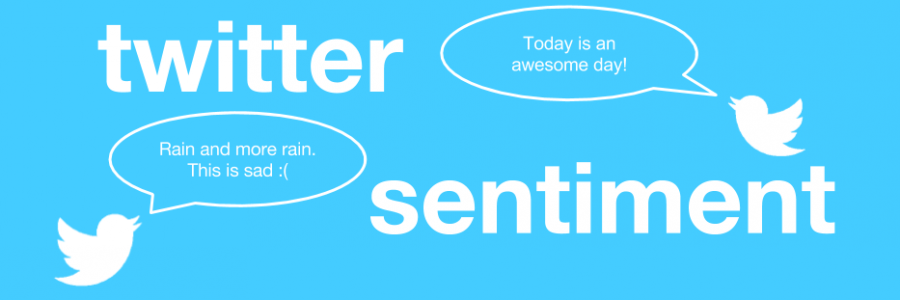

**This project's aim**, is to explore the world of Natural Language Processing (NLP) by building what is known as a Sentiment Analysis Model. A sentiment analysis model is a model that analyses a given piece of text and predicts whether this piece of text expresses positive or negative sentiment.

<div style="text-align: center; background-color: #856ff8; padding: 10px;">
    <h2 style="font-weight: bold;">OUTLINE</h2>
</div>

- Importing Various Modules
- Loading Dataset
- Data Processing
- Trim Data
- Save Dataframe to CSV File

<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">IMPORTING VARIOUS MODULES</h2>
</div>

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">LOADING DATASET</h2>
</div>

In [2]:
# Reading the dataset with no columns titles and with latin encoding 
twitter_data_raw = pd.read_csv('sentiment140.csv', encoding = "ISO-8859-1", header=None)

In [3]:
# As the data has no column titles, we will add our own
twitter_data_raw.columns = ["label", "time", "date", "query", "username", "text"]

In [4]:
# Show the first 5 rows of the dataframe.
twitter_data_raw.head().style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,label,time,date,query,username,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."


In [5]:
# Print bottom 5 rows in the dataframe.
twitter_data_raw.tail().style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,label,time,date,query,username,text
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best feeling ever
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interviews! â« http://blip.fm/~8bmta
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me for details
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity @SpeakingUpH4H


In [6]:
# Print the shape of the DataFrame
print("The shape of data frame:", twitter_data_raw.shape)
# Print the length (number of rows) of the DataFrame
print("Number of Rows in the dataframe:", len(twitter_data_raw))
# Print the number of columns in the DataFrame
print("Number of Columns in the dataframe:", len(twitter_data_raw.columns))

The shape of data frame: (1600000, 6)
Number of Rows in the dataframe: 1600000
Number of Columns in the dataframe: 6


In [7]:
twitter_data_raw.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   label     1600000 non-null  int64 
 1   time      1600000 non-null  int64 
 2   date      1600000 non-null  object
 3   query     1600000 non-null  object
 4   username  1600000 non-null  object
 5   text      1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [8]:
sentiment_counts = twitter_data_raw['label'].value_counts()

In [9]:
# Print the counts and sentiment labels
print("Sentiment Distribution:")
print("Negative (0):", sentiment_counts[0])
print("Positive (4):", sentiment_counts[4])

Sentiment Distribution:
Negative (0): 800000
Positive (4): 800000


In [10]:
# Calculate and print the percentage breakdown
total_tweets = len(twitter_data_raw)
percentage_negative = (sentiment_counts[0] / total_tweets) * 100
percentage_positive = (sentiment_counts[4] / total_tweets) * 100

In [11]:
print("\nPercentage Breakdown:")
print("Negative: {:.2f}%".format(percentage_negative))
print("Positive: {:.2f}%".format(percentage_positive))


Percentage Breakdown:
Negative: 50.00%
Positive: 50.00%


<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">DATA PROCESSING</h2>
</div>

In [12]:
# Ommiting every column except for the text and the label, as we won't need any of the other information
selected_columns = ['label', 'text']
twitter_data = twitter_data_raw[selected_columns]

In [13]:
# Display the first few rows of the resulting DataFrame
print("Selected Columns - 'label' and 'text':")
print(twitter_data.head())

Selected Columns - 'label' and 'text':
   label                                               text
0      0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1      0  is upset that he can't update his Facebook by ...
2      0  @Kenichan I dived many times for the ball. Man...
3      0    my whole body feels itchy and like its on fire 
4      0  @nationwideclass no, it's not behaving at all....


In [14]:
# Print information about the DataFrame
print("\nDataFrame Info:")
print(twitter_data.info())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   label   1600000 non-null  int64 
 1   text    1600000 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB
None


In [15]:
# Display the shape of the DataFrame
# Print the shape of the new DataFrame
print("The shape of data frame:", twitter_data.shape)
# Print the length (number of rows) of the new DataFrame
print("Number of Rows in the dataframe:", len(twitter_data))
# Print the number of columns in the new DataFrame
print("Number of Columns in the dataframe:", len(twitter_data.columns))

The shape of data frame: (1600000, 2)
Number of Rows in the dataframe: 1600000
Number of Columns in the dataframe: 2


<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">TRIM DATA</h2>
</div>

In [16]:
# Seperating positive and negative rows
twitter_data_pos = twitter_data[twitter_data['label'] == 4]
twitter_data_neg = twitter_data[twitter_data['label'] == 0]

In [17]:
# Only retaining a fraction of the data from each output group using sample
frac = 1/4  # You can adjust this fraction as needed
twitter_data_pos = twitter_data_pos.sample(frac=frac, random_state=42)
twitter_data_neg = twitter_data_neg.sample(frac=frac, random_state=42)

In [18]:
# Concatenating both positive and negative groups and storing them back into a single dataframe
twitter_data = pd.concat([twitter_data_pos, twitter_data_neg])

In [19]:
# Display lengths
print(len(twitter_data_pos), len(twitter_data_neg))
print(len(twitter_data))

200000 200000
400000


<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">SAVING THE DATASET</h2>
</div>

In [20]:
output_file_path = 'twitter_sentiment_data.csv'

In [21]:
# Save the DataFrame to a CSV file
twitter_data.to_csv(output_file_path, index=False)

In [22]:
print("DataFrame saved to:", output_file_path)

DataFrame saved to: twitter_sentiment_data.csv
